# COMP30027 Machine Learning Project 2

In [337]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# read data
movie = pd.read_csv('movie_metadata.csv')
test = pd.read_csv('test_dataset.csv')
train = pd.read_csv('train_dataset.csv')

## 1. Analyze data

In [338]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [345]:
mc = dict(zip(movie['movie_title'], movie['imdb_score']))

In [347]:
train['imdb_score'] = [mc.get(title) for title in train['movie_title']]

In [357]:
test['imdb_score'] = [mc.get(title) for title in test['movie_title']]

In [359]:
test[['movie_title','imdb_score']].tail(50)

,movie_title,imdb_score
702,Observe and Report,5.8
703,The Assassination of Jesse James by the Coward...,7.5
704,On Deadly Ground,4.4
705,The Day the Earth Stood Still,5.5
706,Everybody's Fine,7.2
707,Conan the Barbarian,6.9
708,The Magic Sword: Quest for Camelot,6.2
709,A Bug's Life,7.2
710,Girl 6,5.0
711,Something's Gotta Give,6.7


In [355]:
train[['movie_title','imdb_score']].tail(50)

,movie_title,imdb_score
2954,American Desi,6.7
2955,The Guru,5.4
2956,Juno,7.5
2957,Harry Potter and the Prisoner of Azkaban,7.8
2958,He Got Game,6.9
2959,Zoolander 2,4.8
2960,2001: A Space Odyssey,8.3
2961,Monsoon Wedding,7.4
2962,The Bank Job,7.3
2963,The Shallows,6.8


In [339]:
test['movie_title'].head(20)

0                                         Courage 
1                                         Savages 
2                                        Defendor 
3                               Road to Perdition 
4                                  The To Do List 
5                                       Blindness 
6                                    Interstellar 
7                                  A Few Good Men 
8                             Two Girls and a Guy 
9                               Snakes on a Plane 
10                               Albino Alligator 
11                                   Frozen River 
12                                  Jack and Jill 
13              A Thin Line Between Love and Hate 
14    Talladega Nights: The Ballad of Ricky Bobby 
15                               Meet the Fockers 
16                      The Deep End of the Ocean 
17                      The Clan of the Cave Bear 
18                              Chasing Mavericks 
19                             

In [353]:
train[train['imdb_score_binned']==0][['movie_title','imdb_score_binned','imdb_score']]

,movie_title,imdb_score_binned,imdb_score
24,Doogal,0,2.8
71,Barney's Great Adventure,0,2.8
162,Alone in the Dark,0,2.3
331,Battlefield Earth,0,2.4
359,Chairman of the Board,0,2.3
443,Shanghai Surprise,0,3.0
455,Crossover,0,2.1
461,Superbabies: Baby Geniuses 2,0,1.9
680,Jaws: The Revenge,0,2.8
1138,Son of the Mask,0,2.2


In [141]:
# Here use different method explore and understand the dataset, to make decision which features will
# be used in the furthur predict
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3004 non-null   int64  
 1   director_name              3004 non-null   object 
 2   num_critic_for_reviews     3004 non-null   int64  
 3   duration                   3004 non-null   int64  
 4   director_facebook_likes    3004 non-null   int64  
 5   actor_3_facebook_likes     3004 non-null   int64  
 6   actor_2_name               3004 non-null   object 
 7   actor_1_facebook_likes     3004 non-null   int64  
 8   gross                      3004 non-null   int64  
 9   genres                     3004 non-null   object 
 10  actor_1_name               3004 non-null   object 
 11  movie_title                3004 non-null   object 
 12  num_voted_users            3004 non-null   int64  
 13  cast_total_facebook_likes  3004 non-null   int64

In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         752 non-null    int64  
 1   director_name              752 non-null    object 
 2   num_critic_for_reviews     752 non-null    int64  
 3   duration                   752 non-null    int64  
 4   director_facebook_likes    752 non-null    int64  
 5   actor_3_facebook_likes     752 non-null    int64  
 6   actor_2_name               752 non-null    object 
 7   actor_1_facebook_likes     752 non-null    int64  
 8   gross                      752 non-null    int64  
 9   genres                     752 non-null    object 
 10  actor_1_name               752 non-null    object 
 11  movie_title                752 non-null    object 
 12  num_voted_users            752 non-null    int64  
 13  cast_total_facebook_likes  752 non-null    int64  

In [19]:
train['imdb_score_binned'].value_counts().sort_index()

0      24
1     235
2    1839
3     777
4     129
Name: imdb_score_binned, dtype: int64

In [20]:
train['imdb_score_binned'].value_counts(normalize=True).sort_index()

0    0.007989
1    0.078229
2    0.612184
3    0.258655
4    0.042943
Name: imdb_score_binned, dtype: float64

In [39]:
train.head(1).T

,0
id,1
director_name,Roger Allers
num_critic_for_reviews,186
duration,73
director_facebook_likes,28
actor_3_facebook_likes,847
actor_2_name,Nathan Lane
actor_1_facebook_likes,2000
gross,422783777
genres,Adventure|Animation|Drama|Family|Musical


### title_embedding

In [40]:
print(train['title_embedding'].iloc[0])

[-4.1984697e-03  4.2941985e-03 -1.1961063e-03  3.6814427e-03
  3.2565726e-03 -3.5001317e-03  1.0069078e-03  1.1182259e-03
  4.2644851e-03 -1.0382137e-03 -3.6454869e-03 -6.9513317e-04
 -1.1519078e-03  2.2030093e-03 -1.7748430e-03 -3.1937044e-03
 -6.5757957e-04  1.7453490e-04 -2.2419260e-03 -3.0175799e-03
 -3.5909249e-03 -4.7650263e-03 -2.1646160e-03  5.1170369e-03
 -8.7369876e-03 -5.5002053e-03 -1.8632645e-03 -1.6813033e-03
 -1.9086580e-03 -1.5372996e-03  7.3320977e-04 -3.6102086e-03
  4.6479381e-03 -7.4564219e-03 -2.2147747e-03  1.0003914e-02
  3.0996688e-03  9.7796484e-04  2.5147211e-03 -2.3555579e-03
  8.6343372e-03 -5.6004054e-03 -1.6822485e-03 -3.8470356e-03
 -1.5438221e-03 -3.9288620e-03 -2.6225317e-03  3.7558300e-03
  1.4958460e-03  6.0779587e-03 -3.9718510e-03 -5.4420657e-03
  9.4871456e-03 -5.3161406e-03 -1.4914786e-03 -2.3536941e-03
  5.4897196e-03 -6.9670402e-03  2.6748128e-05  1.8063770e-03
  2.1376107e-03 -6.1884883e-04 -3.6032442e-03  7.2673097e-04
 -1.0546452e-04  4.90887

### director_name/ actor name

In [153]:
train['actor_1_name'].unique()
train['actor_1_name'].nunique()

1265

In [154]:
train['actor_2_name'].unique()
train['actor_2_name'].nunique()

1903

In [82]:
train['director_name'].unique()
train['director_name'].nunique()

1460

In [102]:
director = train.groupby(['director_name'])['imdb_score_binned'].agg(['mean','count'])
director_1 = director[director['count']<3]
director_1.sort_values(by='count')

,mean,count
director_name,,
Aaron Seltzer,0.0,1
Mark Sandrich,3.0,1
Mark Tonderai,2.0,1
Mars Callahan,2.0,1
Martin Koolhoven,3.0,1
...,...,...
Neill Blomkamp,2.5,2
Don Michael Paul,0.5,2
Douglas McGrath,2.0,2


In [89]:
train.groupby(['director_name'])['imdb_score_binned'].describe()

,count,mean,std,min,25%,50%,75%,max
director_name,,,,,,,,
Aaron Seltzer,1.0,0.000000,NaN,0.0,0.00,0.0,0.0,0.0
Abel Ferrara,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Adam Marcus,1.0,1.000000,NaN,1.0,1.00,1.0,1.0,1.0
Adam McKay,5.0,2.400000,0.547723,2.0,2.00,2.0,3.0,3.0
Adam Rapp,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...
Zack Snyder,6.0,2.666667,0.516398,2.0,2.25,3.0,3.0,3.0
Zak Penn,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Zal Batmanglij,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0


### content_rating

In [145]:
train['content_rating'].unique()
train['content_rating'].nunique()

12

In [66]:
train.groupby(['content_rating'])['imdb_score_binned'].agg(['mean','count']).sort_values(by='mean')

,mean,count
content_rating,,
GP,2.000000,1
NC-17,2.000000,3
Passed,2.000000,2
PG-13,2.123195,1039
PG,2.179039,458
G,2.338235,68
R,2.353157,1362
Unrated,2.421053,19
X,2.444444,9


### plot_keywords

In [144]:
train['plot_keywords'].unique()
train['plot_keywords'].nunique()

2943

In [70]:
plot_split = train[['plot_keywords','imdb_score_binned']]
plot_split['plot'] = train['plot_keywords'].str.split('|')
plot_split = plot_split.explode('plot')
plot_split['plot'].value_counts().sort_values()

C:\Users\L\AppData\Local\Temp\ipykernel_19272\3224103376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_split['plot'] = train['plot_keywords'].str.split('|')


school choir                 1
lead actor's first film      1
physical torture             1
graduate student             1
kleptomaniac                 1
                          ... 
police                      72
death                       87
murder                     109
friend                     109
love                       124
Name: plot, Length: 5892, dtype: int64

In [75]:
plot_rate = plot_split.groupby(['plot'])['imdb_score_binned'].agg(['mean','count']).sort_values(by='count')
plot_rate

,mean,count
plot,,
10 year old,2.000000,1
new york cosmos,3.000000,1
new job,2.000000,1
new home,3.000000,1
new hampshire,2.000000,1
...,...,...
police,2.402778,72
death,2.264368,87
murder,2.201835,109


### genres

In [44]:
train['genres'].unique()
train['genres'].nunique()

675

In [53]:
gen_split = train[['genres','imdb_score_binned']]
gen_split['gen'] = train['genres'].str.split('|')
gen_split = gen_split.explode('gen')
gen_split['gen'].value_counts().sort_values()

C:\Users\L\AppData\Local\Temp\ipykernel_19272\3487904838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_split['gen'] = train['genres'].str.split('|')


Film-Noir         1
Documentary      37
Western          41
Musical          79
Sport           114
History         125
Music           126
War             127
Animation       146
Biography       194
Mystery         306
Horror          321
Family          354
Sci-Fi          388
Fantasy         405
Crime           568
Adventure       612
Romance         699
Action          765
Thriller        884
Comedy         1175
Drama          1505
Name: gen, dtype: int64

In [56]:
gen_rate = gen_split.groupby(['gen'])['imdb_score_binned'].agg(['mean','count']).sort_values(by='mean')

<Axes: >

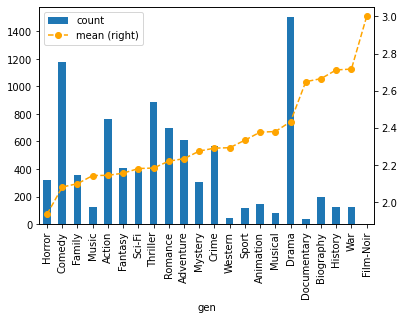

In [64]:
ax = gen_rate['count'].plot(kind='bar',label='count',legend=True,grid=True,use_index=False)
gen_rate['mean'].plot(kind='line',label='mean',ax=ax,rot=90,legend=True,secondary_y=True,color='orange',marker='o',linestyle='--')

### language

In [310]:
train[train['language']=='English'].shape[0]/3004

0.9560585885486018

In [146]:
train['language'].value_counts().sort_index()

Aboriginal       2
Arabic           1
Aramaic          1
Bosnian          1
Cantonese        5
Czech            1
Danish           3
Dari             2
Dutch            3
English       2872
Filipino         1
French          32
German           9
Hebrew           1
Hindi            3
Hungarian        1
Indonesian       2
Italian          5
Japanese         9
Kazakh           1
Korean           4
Mandarin         9
Maya             1
Mongolian        1
None             1
Norwegian        3
Persian          2
Portuguese       4
Romanian         1
Spanish         19
Thai             2
Vietnamese       1
Zulu             1
Name: language, dtype: int64

In [147]:
train.groupby(['imdb_score_binned'])['language'].value_counts()

imdb_score_binned  language  
0                  English         24
1                  English        234
                   Bosnian          1
2                  English       1804
                   French           7
                   Spanish          6
                   Italian          4
                   Mandarin         4
                   Japanese         3
                   Norwegian        2
                   Aboriginal       1
                   Cantonese        1
                   Filipino         1
                   German           1
                   Hindi            1
                   Kazakh           1
                   Korean           1
                   Portuguese       1
                   Thai             1
3                  English        703
                   French          23
                   Spanish          9
                   German           5
                   Mandarin         5
                   Cantonese        4
                   D

In [14]:
train.groupby(['imdb_score_binned'])['language'].describe()

,count,unique,top,freq
imdb_score_binned,,,,
0,24,1,English,24
1,235,2,English,234
2,1839,16,English,1804
3,777,29,English,703
4,129,11,English,107


In [15]:
train.groupby(['language'])['imdb_score_binned'].describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
Aboriginal,2.0,2.500000,0.707107,2.0,2.25,2.5,2.75,3.0
Arabic,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
Aramaic,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
Bosnian,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
Cantonese,5.0,2.800000,0.447214,2.0,3.00,3.0,3.00,3.0
Czech,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
Danish,3.0,3.666667,0.577350,3.0,3.50,4.0,4.00,4.0
Dari,2.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0
Dutch,3.0,3.000000,0.000000,3.0,3.00,3.0,3.00,3.0


In [260]:
train.groupby(train['language']=='English')['imdb_score_binned'].mean()

language
False    2.886364
True     2.221100
Name: imdb_score_binned, dtype: float64

### other features

In [30]:
train.groupby(['imdb_score_binned'])['director_facebook_likes'].describe()

,count,mean,std,min,25%,50%,75%,max
imdb_score_binned,,,,,,,,
0,24.0,143.416667,242.636589,0.0,15.0,70.0,115.75,892.0
1,235.0,167.004255,1015.100157,0.0,8.0,27.0,79.50,11000.0
2,1839.0,493.214247,2187.669464,0.0,13.0,58.0,189.00,23000.0
3,777.0,1272.722008,3844.692674,0.0,4.0,101.0,387.00,22000.0
4,129.0,3109.860465,6381.592554,0.0,0.0,161.0,835.00,22000.0


In [17]:
train.groupby(['country'])['imdb_score_binned'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Afghanistan,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
Argentina,3.0,3.000000,1.000000,2.0,2.50,3.0,3.50,4.0
Aruba,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
Australia,32.0,2.312500,0.644455,1.0,2.00,2.0,3.00,4.0
Belgium,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
Brazil,4.0,3.250000,0.957427,2.0,2.75,3.5,4.00,4.0
Canada,46.0,2.065217,0.742434,0.0,2.00,2.0,2.00,4.0
Chile,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
China,9.0,2.666667,0.500000,2.0,2.00,3.0,3.00,3.0


In [314]:
(3004-2382-255.0)/3004

0.12217043941411451

In [18]:
corr_matrix = train.corr()['imdb_score_binned']
corr_matrix

id                           0.024372
num_critic_for_reviews       0.323469
duration                     0.342942
director_facebook_likes      0.186696
actor_3_facebook_likes       0.063410
actor_1_facebook_likes       0.079192
gross                        0.214375
num_voted_users              0.524271
cast_total_facebook_likes    0.090961
facenumber_in_poster        -0.064962
num_user_for_reviews         0.346908
title_year                  -0.145859
actor_2_facebook_likes       0.083932
movie_facebook_likes         0.296957
average_degree_centrality    0.164949
imdb_score_binned            1.000000
Name: imdb_score_binned, dtype: float64

In [152]:
train[['facenumber_in_poster','gross','title_year','cast_total_facebook_likes','num_voted_users','num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes']].describe().round(3)

,facenumber_in_poster,gross,title_year,cast_total_facebook_likes,num_voted_users,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes
count,3004.000,3.004000e+03,3004.000,3004.000,3004.000,3004.000,3004.000,3004.000,3004.000,3004.000
mean,1.381,5.187733e+07,2002.783,11391.644,104901.737,165.609,110.077,778.890,767.860,7654.936
std,2.093,6.840156e+07,10.086,20044.723,150857.278,121.255,21.911,2990.742,1901.991,16488.762
min,0.000,1.620000e+02,1929.000,0.000,91.000,2.000,37.000,0.000,0.000,0.000
25%,0.000,8.579684e+06,1999.000,1873.000,18978.250,76.000,96.000,10.000,191.000,728.500
50%,1.000,3.020586e+07,2004.000,3889.000,53874.000,137.000,106.000,62.500,433.000,1000.000
75%,2.000,6.647359e+07,2010.000,15925.250,128489.500,223.000,120.000,234.000,683.000,12000.000
max,43.000,6.586723e+08,2016.000,656730.000,1689764.000,813.000,330.000,23000.000,23000.000,640000.000


In [34]:
pd.crosstab(index=train['language']=='English',columns=train['imdb_score_binned'],values=train['imdb_score_binned'],
           aggfunc=['count'],margins=True).round(3).fillna(0).astype(int)

count                           
imdb_score_binned     0    1     2    3    4   All
language                                          
False                 0    1    35   74   22   132
True                 24  234  1804  703  107  2872
All                  24  235  1839  777  129  3004

<Axes: >

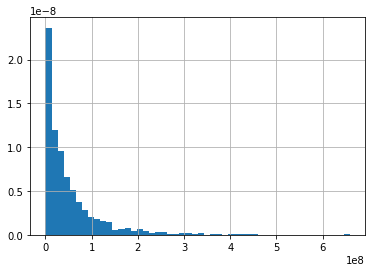

In [28]:
train['gross'].hist(bins=50,density=True)

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
       <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
       <Axes: title={'center': '4'}>], dtype=object)

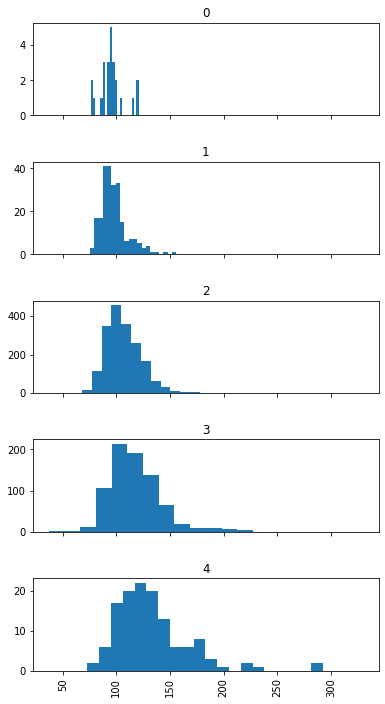

In [32]:
train.hist('duration',by='imdb_score_binned',bins=20,layout=(5,1),density=False,sharex=True,figsize=(6,12))

## 2. Preprocess

### Basic features

In [160]:
## one-hot for contentrating, predict and concate for plotkeywords,dirctorname,titleembeding,genres, country?
## 'content_rating','director_name'

# basic feature
basic = train.drop(columns=['id','actor_1_name','actor_2_name','actor_3_name',
                           'movie_title','title_embedding','country','plot_keywords',
                            'director_name','content_rating','genres'])
basic['language']=(basic['language'] == 'English').astype('int')
basic.head(10)       

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
0,186,73,28,847,2000,422783777,644348,6458,0,656,1,1994,886,17000,0.001576,4
1,252,97,0,233,654,20433940,78883,1876,8,662,1,2005,529,0,0.000675,2
2,232,117,234,221,12000,371897,36494,13607,2,118,1,2013,1000,11000,0.003002,2
3,297,109,0,145,957,13782838,258078,1757,0,911,1,1982,163,23000,0.001726,4
4,297,171,0,857,16000,313837577,1238746,22342,2,5060,1,2001,5000,21000,0.001876,4
5,186,116,0,471,11000,183405771,402645,13028,4,845,1,2001,1000,0,0.004427,3
6,37,99,675,164,902,418953,17322,1582,0,93,1,1993,424,853,0.000825,2
7,82,170,165,244,453,72000000,66959,1164,1,258,1,1964,272,0,0.000300,3
8,107,108,529,83,11000,8535575,24033,11519,3,152,1,2005,329,0,0.003827,2
9,73,134,45,0,9,195888,5603,11,0,45,0,2005,2,607,0.000300,3


In [242]:
basicc = train.drop(columns=['id','actor_1_name','actor_2_name','actor_3_name',
                          'movie_title', 'title_embedding','country','plot_keywords',
                            'director_name','content_rating','genres'])
basicc['language']=(basicc['language'] == 'English').astype('int')
basicc['movie_title']= train['movie_title']
basicc.head(2).T

,0,1
num_critic_for_reviews,186,252
duration,73,97
director_facebook_likes,28,0
actor_3_facebook_likes,847,233
actor_1_facebook_likes,2000,654
gross,422783777,20433940
num_voted_users,644348,78883
cast_total_facebook_likes,6458,1876
facenumber_in_poster,0,8
num_user_for_reviews,656,662


In [243]:
basicc['language'].value_counts().sort_index()

0     132
1    2872
Name: language, dtype: int64

### title embedding

In [268]:
# title embedding
tit_emb = pd.DataFrame(np.load('train_fasttext_title_embeddings.npy'))
tit_emb

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.004198,0.004294,-0.001196,0.003681,0.003257,-0.003500,0.001007,0.001118,0.004264,-0.001038,...,0.004746,0.003770,0.001390,0.003076,-0.008132,0.001598,0.006643,0.002400,-0.003933,-0.005527
1,-0.004759,0.002651,-0.000380,0.001635,0.003939,-0.003758,-0.000156,0.004196,0.001613,-0.000283,...,0.005036,0.003941,0.003205,0.001162,-0.005804,0.002159,0.003575,-0.000710,-0.003438,-0.006788
2,0.002781,-0.003155,-0.000064,0.003097,0.002036,-0.006839,-0.003710,0.000559,-0.003780,0.003445,...,-0.000173,0.000985,-0.004908,0.000435,0.002376,0.000944,0.003305,0.000132,-0.002589,-0.002180
3,-0.005327,0.003607,0.000792,0.004539,0.003718,-0.004677,-0.000492,0.002531,0.004847,-0.001693,...,0.005158,0.005430,0.003289,0.002486,-0.010253,0.003423,0.006926,0.001835,-0.005065,-0.008602
4,-0.004259,0.003626,-0.001533,0.001513,0.004033,-0.003782,0.000013,0.003052,0.002775,-0.001284,...,0.004583,0.005102,0.002862,0.000808,-0.007791,0.002772,0.005651,-0.000516,-0.004016,-0.006797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,-0.002348,0.000408,-0.000467,0.000745,0.001783,-0.001585,0.001453,0.000740,0.002141,-0.000356,...,0.001290,0.002782,-0.000041,0.001678,-0.002992,-0.000076,0.002639,-0.000180,-0.001575,-0.002464
3000,0.001623,-0.000492,0.003654,-0.002049,0.001007,-0.001930,-0.004225,-0.000030,0.001104,0.000742,...,0.000591,-0.000388,0.001460,-0.000175,-0.000439,0.000435,-0.000345,0.003004,0.000988,-0.001010
3001,-0.001068,0.001700,-0.000299,0.001042,0.002339,-0.000622,0.000503,-0.000611,0.000021,0.000126,...,-0.000081,0.001027,-0.000284,0.000425,-0.000426,0.000349,0.002354,0.000964,-0.000928,-0.000762
3002,-0.001281,-0.001883,0.001825,0.000575,0.000522,-0.001380,-0.000509,0.000530,0.000382,-0.001104,...,-0.001824,0.001365,-0.000980,-0.000108,-0.002340,0.002191,0.000235,0.000919,-0.000518,-0.001860


In [269]:
pca_tit_emb = PCA(n_components=1).fit_transform(tit_emb)
pca_tit_emb

array([[ 0.02399759],
       [ 0.01931632],
       [-0.00713635],
       ...,
       [-0.00782214],
       [-0.00900465],
       [-0.00878272]], dtype=float32)

In [270]:
gen = pd.DataFrame(np.load('train_doc2vec_features_genre.npy'))
gen

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.003078,-0.001645,0.000963,0.004447,-0.004529,-0.004473,0.003909,0.004564,0.003794,0.003423,...,0.003979,-0.000858,-0.003044,0.005115,-0.004049,0.004527,-0.003424,0.003950,-0.000030,-0.000015
1,0.001751,0.001050,0.004607,0.004628,0.001012,-0.002374,0.004605,0.003367,-0.001582,0.001267,...,0.003008,-0.000361,-0.001131,0.002385,-0.000732,0.004247,-0.002316,0.003744,-0.001445,-0.003186
2,-0.003030,-0.003056,-0.003525,0.000694,-0.004099,0.004493,-0.003417,0.002340,-0.000459,-0.001956,...,-0.000025,0.000494,0.004523,-0.001346,-0.004995,0.002332,0.003641,0.001558,-0.002145,0.000789
3,0.004092,0.002768,0.002552,0.001296,0.004030,-0.003070,-0.002222,-0.001617,-0.003442,-0.003462,...,0.002403,-0.000576,-0.005032,-0.003371,-0.001036,-0.000963,0.004807,0.001817,-0.004264,0.004020
4,-0.004901,-0.004752,0.001945,-0.000877,-0.002040,-0.002817,-0.002492,0.000611,-0.004110,-0.002999,...,-0.001486,0.005073,0.002710,0.004516,-0.003665,0.003081,0.001385,0.000129,-0.000322,0.004351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,-0.000862,-0.001992,-0.000053,0.004200,-0.002231,0.000348,0.002995,0.003092,0.001270,-0.000302,...,0.004493,-0.004911,0.000507,-0.003834,-0.001346,0.004662,-0.002102,-0.000527,-0.002398,0.001198
3000,-0.002787,0.002318,0.003571,0.000915,-0.000928,0.005006,0.002615,-0.004406,0.002379,-0.004342,...,-0.000795,-0.003371,0.000249,-0.000206,0.002366,-0.002529,-0.000118,-0.000151,-0.000598,-0.002607
3001,-0.000343,0.000626,-0.001660,-0.001445,-0.000766,0.004136,0.000865,0.002257,-0.002166,-0.004688,...,0.004048,0.003378,0.001577,0.001315,-0.003103,0.002990,0.003521,0.002148,-0.001070,-0.000880
3002,-0.000772,-0.002022,-0.000056,0.004200,-0.002292,0.000327,0.002994,0.003136,0.001233,-0.000283,...,0.004526,-0.005044,0.000484,-0.003782,-0.001333,0.004530,-0.002144,-0.000504,-0.002370,0.001125


In [271]:
pca_gen = PCA(n_components=1).fit_transform(gen)
pca_gen

array([[ 0.000304  ],
       [ 0.0020316 ],
       [-0.00544416],
       ...,
       [-0.00105887],
       [ 0.00341965],
       [-0.01742727]], dtype=float32)

In [272]:
plot = pd.DataFrame(np.load('train_doc2vec_features_plot_keywords.npy'))
plot

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.002800,-0.004956,0.002163,-0.002374,0.000194,0.000719,0.002124,0.002463,-0.001238,-0.003811,...,-0.000493,-0.003545,0.004082,0.003446,-0.000907,0.001471,-0.001883,0.002502,-0.002413,-0.000206
1,0.002123,0.000288,-0.003020,-0.003211,0.004548,0.002667,-0.003825,0.002729,-0.002934,0.002267,...,0.003673,0.001285,0.002591,-0.000728,0.003440,-0.003017,0.001101,0.004059,0.002112,-0.002319
2,-0.002241,-0.000525,0.003643,-0.002979,0.001827,0.001142,-0.001680,0.001540,0.003105,-0.002446,...,-0.001566,-0.002651,0.004508,-0.001642,-0.004585,-0.003740,0.003329,0.003480,-0.004858,0.004275
3,-0.000630,-0.002083,-0.000896,-0.002147,-0.002247,0.003739,-0.004067,-0.003067,-0.002898,0.001222,...,0.003669,0.002197,-0.003719,0.002790,0.004540,-0.000552,-0.004196,0.003911,-0.001663,-0.003593
4,-0.002958,-0.001376,-0.001714,-0.003555,-0.004828,-0.001836,0.002245,-0.002323,0.000544,0.002296,...,0.004995,0.003198,0.002475,-0.003280,-0.000682,0.002077,0.003112,-0.004794,-0.001134,-0.004481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,-0.004451,0.001282,-0.001028,0.001264,-0.002168,-0.002371,0.003521,-0.001685,-0.004788,-0.001259,...,0.003216,-0.001361,0.000631,0.001652,-0.002822,-0.003242,-0.002295,-0.003797,-0.004302,0.000572
3000,-0.002579,0.003613,-0.000705,0.002203,-0.002825,-0.004378,-0.002614,-0.000719,-0.004417,0.000770,...,-0.000464,0.002866,-0.000254,0.001184,0.002742,0.001590,0.002415,0.000533,0.003652,0.000909
3001,-0.004208,0.000275,-0.004846,0.004768,-0.001497,-0.001104,0.002103,0.002355,-0.002910,-0.003924,...,-0.000448,0.001015,-0.003083,0.004713,0.000275,-0.001687,-0.000377,-0.002161,-0.001096,-0.001649
3002,-0.002913,-0.002362,-0.000530,0.004405,-0.002753,0.002375,-0.004464,0.000920,-0.001970,-0.004758,...,-0.002190,0.001432,-0.002220,0.002950,0.002296,0.004381,-0.004630,-0.003284,-0.000077,-0.003472


In [273]:
pca_plot = PCA(n_components=1).fit_transform(plot)
pca_plot

array([[-1.2793761e-03],
       [ 9.3810551e-04],
       [-6.2391060e-05],
       ...,
       [-1.6302890e-04],
       [-5.9941546e-03],
       [-4.5849383e-03]], dtype=float32)

In [267]:
emb = pd.DataFrame(np.concatenate((tit_emb,gen,plot), axis=1))
emb.shape

(3004, 300)

### content_rating

In [162]:
con_rate = pd.get_dummies(train['content_rating'])
con_rate

,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2999,0,0,0,0,0,0,0,1,0,0,0,0
3000,0,0,0,0,0,0,0,0,0,1,0,0
3001,0,0,0,0,0,0,0,0,0,1,0,0
3002,0,0,0,0,0,0,1,0,0,0,0,0


In [277]:
pca_con_rate = PCA(n_components=1).fit_transform(con_rate)
pca_con_rate

array([[ 0.10102395],
       [-0.64562278],
       [-0.64562278],
       ...,
       [-0.64562278],
       [ 0.15507582],
       [ 0.76419392]])

In [157]:
director = pd.DataFrame(np.load('train_countvec_features_director_name.npy'))
director

,0,1,2,3,4,5,6,7,8,9,...,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [278]:
pca_director= PCA(n_components=1).fit_transform(director)
pca_director

array([[-0.03253093],
       [-0.04018238],
       [-0.13537005],
       ...,
       [-0.03328997],
       [-0.02793223],
       [-0.02793223]])

In [158]:
actor1 = pd.DataFrame(np.load('train_countvec_features_actor_1_name.npy'))
actor1

,0,1,2,3,4,5,6,7,8,9,...,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
pca_actor1= PCA(n_components=1).fit_transform(actor1)
pca_actor1

array([[-0.03321334],
       [-0.02457668],
       [-0.03758586],
       ...,
       [-0.03250535],
       [-0.02691988],
       [-0.0234468 ]])

In [177]:
one_hot = pd.DataFrame(np.concatenate((con_rate,director,actor1), axis=1))
one_hot.shape

(3004, 4188)

### split train data

In [297]:
# split train data for test
x_train, x_test, y_train, y_test = train_test_split(
    basic.drop(columns = 'imdb_score_binned'), basic['imdb_score_binned'], test_size = 0.2, random_state = 42
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2403, 15), (601, 15), (2403,), (601,))

In [133]:
train_tit = tit_emb.loc[x_train.index]
test_tit = tit_emb.loc[x_test.index]
train_tit.shape, test_tit.shape

((2403, 100), (601, 100))

In [208]:
train_gen = gen.loc[x_train.index]
test_gen = gen.loc[x_test.index]
train_gen.shape, test_gen.shape

((2403, 100), (601, 100))

In [247]:
train_plot = plot.loc[x_train.index]
test_plot = plot.loc[x_test.index]
train_plot.shape, test_plot.shape

((2403, 100), (601, 100))

In [245]:
train_emb = emb.loc[x_train.index]
test_emb = emb.loc[x_test.index]
train_emb.shape, test_emb.shape

((2403, 300), (601, 300))

In [165]:
train_con_rate = con_rate.loc[x_train.index]
test_con_rate = con_rate.loc[x_test.index]
train_con_rate.shape, test_con_rate.shape

((2403, 12), (601, 12))

In [168]:
train_director = director.loc[x_train.index]
test_director = director.loc[x_test.index]
train_director.shape, test_director.shape

((2403, 2113), (601, 2113))

In [178]:
train_hot = one_hot.loc[x_train.index]
test_hot = one_hot.loc[x_test.index]
train_hot.shape, test_hot.shape

((2403, 4188), (601, 4188))

In [112]:
# normlization
scaler = StandardScaler().fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

## 3. Base model - decision tree

In [290]:
# decison t和rf自带feature importance对normalization不敏感
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(x_train, y_train)
dt.score(x_train, y_train), dt.score(x_test, y_test)

(1.0, 0.6123128119800333)

In [291]:
confusion_matrix(y_test,dt.predict(x_test))

array([[  1,   1,   3,   0,   0],
       [  0,  15,  26,   7,   0],
       [  0,  31, 268,  76,   2],
       [  0,   1,  69,  73,   9],
       [  0,   0,   2,   6,  11]], dtype=int64)

In [287]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.26      0.27      0.27        48
           2       0.73      0.70      0.71       377
           3       0.45      0.49      0.47       152
           4       0.53      0.53      0.53        19

    accuracy                           0.60       601
   macro avg       0.46      0.44      0.45       601
weighted avg       0.61      0.60      0.61       601



In [222]:
dt_scale = DecisionTreeClassifier().fit(x_train_scale, y_train)
dt_scale.score(x_train_scale, y_train), dt_scale.score(x_test_scale, y_test)

(1.0, 0.6256239600665557)

In [224]:
dt_con_rate = DecisionTreeClassifier().fit(train_con_rate, y_train)
dt_con_rate.score(train_con_rate, y_train), dt_con_rate.score(test_con_rate, y_test)

(0.6100707449022056, 0.627287853577371)

In [225]:
dt_director = DecisionTreeClassifier().fit(train_director, y_train)
dt_director.score(train_director, y_train), dt_director.score(test_director, y_test)

(0.813150228880566, 0.6139767054908486)

In [226]:
dt_hot = DecisionTreeClassifier().fit(train_hot, y_train)
dt_hot.score(train_hot, y_train), dt_hot.score(test_hot, y_test)

(0.9841864336246359, 0.56738768718802)

In [227]:
confusion_matrix(y_test,dt_hot.predict(test_hot))

array([[  1,   1,   3,   0,   0],
       [  0,   5,  33,   9,   1],
       [  6,  22, 291,  51,   7],
       [  0,   2, 101,  42,   7],
       [  1,   1,  10,   5,   2]], dtype=int64)

In [190]:
# random forest
# 模型逻辑比tree有优势，genralization能力更强，是多个tree拼接再统一考虑的结果
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier().fit(x_train, y_train)
rf.score(x_train, y_train),rf.score(x_test,y_test)

(1.0, 0.7420965058236273)

In [191]:
confusion_matrix(y_test,rf.predict(x_test))

array([[  0,   0,   5,   0,   0],
       [  0,   2,  46,   0,   0],
       [  0,   0, 351,  26,   0],
       [  0,   0,  61,  86,   5],
       [  0,   0,   2,  10,   7]], dtype=int64)

In [204]:
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.04      0.08        48
           2       0.75      0.93      0.83       377
           3       0.70      0.57      0.63       152
           4       0.58      0.37      0.45        19

    accuracy                           0.74       601
   macro avg       0.61      0.38      0.40       601
weighted avg       0.75      0.74      0.70       601



C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [276]:
## one-hot for contentrating, predict and concate for plotkeywords,dirctorname,titleembeding,genres, country?
## 'content_rating','director_name'

# basic feature
basic_pca = train.drop(columns=['id','actor_1_name','actor_2_name','actor_3_name',
                           'movie_title','title_embedding','country','plot_keywords',
                            'director_name','content_rating','genres'])
basic_pca['language']=(basic_pca['language'] == 'English').astype('int')
basic_pca['gen'] = pca_gen
basic_pca['plot'] = pca_plot
basic_pca['tit_emb'] = pca_tit_emb

basic_pca

# split train data for test
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(
    basic_pca.drop(columns = 'imdb_score_binned'), basic_pca['imdb_score_binned'], test_size = 0.2, random_state = 42
)
x_train_pca.shape, x_test_pca.shape, y_train_pca.shape, y_test_pca.shape

rf_pca =RandomForestClassifier().fit(x_train_pca, y_train_pca)
rf_pca.score(x_train_pca, y_train_pca),rf_pca.score(x_test_pca,y_test_pca)

(1.0, 0.7354409317803661)

In [284]:
# normlization
scaler_pca = StandardScaler().fit(x_train_pca)
x_train_scale_pca = scaler_pca.transform(x_train_pca)
x_test_scale_pca = scaler_pca.transform(x_test_pca)

# logistic regression 不scal影响大
lr_pca = LogisticRegression(max_iter=1000).fit(x_train_scale_pca,y_train_pca)
lr_pca.score(x_train_scale_pca,y_train_pca),lr_pca.score(x_test_scale_pca,y_test_pca)

(0.7045359966708281, 0.7121464226289518)

In [281]:
## one-hot for contentrating, predict and concate for plotkeywords,dirctorname,titleembeding,genres, country?
## 'content_rating','director_name'

# basic feature
basic_pca_all = train.drop(columns=['id','actor_1_name','actor_2_name','actor_3_name',
                           'movie_title','title_embedding','country','plot_keywords',
                            'director_name','content_rating','genres'])
basic_pca_all['language']=(basic_pca_all['language'] == 'English').astype('int')
basic_pca_all['gen'] = pca_gen
basic_pca_all['plot'] = pca_plot
basic_pca_all['tit_emb'] = pca_tit_emb
basic_pca_all['con_rate'] = pca_con_rate
basic_pca_all['director'] = pca_director
basic_pca_all['actor1'] = pca_actor1

basic_pca_all

# split train data for test
x_train_pca_all, x_test_pca_all, y_train_pca_all, y_test_pca_all = train_test_split(
    basic_pca_all.drop(columns = 'imdb_score_binned'), basic_pca_all['imdb_score_binned'], test_size = 0.2, random_state = 42
)
x_train_pca_all.shape, x_test_pca_all.shape, y_train_pca_all.shape, y_test_pca_all.shape

rf_pca_all =RandomForestClassifier().fit(x_train_pca_all, y_train_pca_all)
rf_pca_all.score(x_train_pca_all, y_train_pca_all),rf_pca_all.score(x_test_pca_all,y_test_pca_all)

(1.0, 0.7387687188019967)

In [315]:
pd.Series(rf_pca_all.feature_importances_,index=x_train_pca_all.columns).sort_values(ascending=False)

num_voted_users              0.124283
num_user_for_reviews         0.070264
duration                     0.063576
title_year                   0.058864
gross                        0.055966
gen                          0.052668
num_critic_for_reviews       0.052459
movie_facebook_likes         0.050275
director_facebook_likes      0.047891
actor_3_facebook_likes       0.046687
plot                         0.045360
cast_total_facebook_likes    0.043483
actor_2_facebook_likes       0.041432
tit_emb                      0.040088
director                     0.039776
actor1                       0.039278
average_degree_centrality    0.038343
actor_1_facebook_likes       0.035942
con_rate                     0.021063
facenumber_in_poster         0.020467
language                     0.011834
dtype: float64

<Axes: >

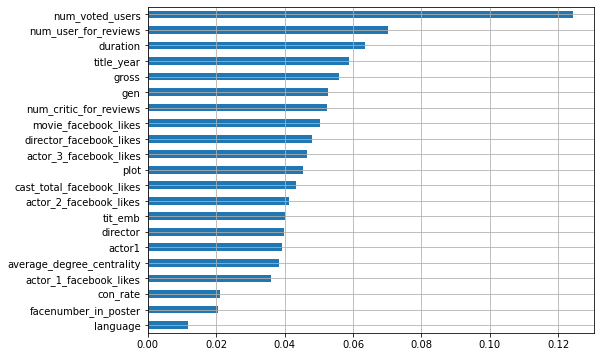

In [317]:
pd.Series(rf_pca_all.feature_importances_,index=x_train_pca_all.columns).sort_values().plot.barh(grid=True,figsize=(8,6))

In [285]:
# normlization
scaler_pca_all = StandardScaler().fit(x_train_pca_all)
x_train_scale_pca_all = scaler_pca_all.transform(x_train_pca_all)
x_test_scale_pca_all = scaler_pca_all.transform(x_test_pca_all)

# logistic regression 不scal影响大
lr_pca_all = LogisticRegression(max_iter=1000).fit(x_train_scale_pca_all,y_train_pca_all)
lr_pca_all.score(x_train_scale_pca_all,y_train_pca_all),lr_pca_all.score(x_test_scale_pca_all,y_test_pca_all)

(0.7049521431543904, 0.7171381031613977)

In [283]:
confusion_matrix(y_test_pca_all,rf_pca_all.predict(x_test_pca_all))

array([[  0,   0,   5,   0,   0],
       [  0,   3,  45,   0,   0],
       [  0,   0, 346,  31,   0],
       [  0,   0,  62,  86,   4],
       [  0,   0,   2,   8,   9]], dtype=int64)

In [193]:
rf_scale =RandomForestClassifier().fit(x_train_scale, y_train)
rf_scale.score(x_train_scale, y_train),rf_scale.score(x_test_scale,y_test)

(1.0, 0.7321131447587355)

In [211]:
rf_gen =RandomForestClassifier().fit(train_gen, y_train)
rf_gen.score(train_gen, y_train),rf_gen.score(test_gen,y_test)

(0.9916770703287557, 0.6372712146422629)

In [213]:
confusion_matrix(y_test,rf_gen.predict(test_gen))

array([[  0,   0,   4,   1,   0],
       [  0,   1,  44,   3,   0],
       [  0,  11, 328,  38,   0],
       [  0,   4,  93,  54,   1],
       [  0,   1,  16,   2,   0]], dtype=int64)

In [194]:
rf_hot =RandomForestClassifier().fit(train_hot, y_train)
rf_hot.score(train_hot, y_train),rf_hot.score(test_hot,y_test)

(0.9841864336246359, 0.6422628951747088)

In [195]:
confusion_matrix(y_test,rf_hot.predict(test_hot))

array([[  0,   0,   5,   0,   0],
       [  0,   2,  42,   3,   1],
       [  0,   6, 352,  19,   0],
       [  0,   0, 115,  32,   5],
       [  0,   1,  15,   3,   0]], dtype=int64)

In [181]:
rf_con_rate =RandomForestClassifier().fit(train_con_rate, y_train)
rf_con_rate.score(train_con_rate, y_train),rf_con_rate.score(test_con_rate,y_test)

(0.6100707449022056, 0.6222961730449251)

In [185]:
confusion_matrix(y_test,rf_con_tate.predict(test_con_rate))

array([[  0,   0,   5,   0,   0],
       [  0,   0,  48,   0,   0],
       [  0,   1, 370,   5,   1],
       [  0,   0, 148,   4,   0],
       [  0,   0,  18,   1,   0]], dtype=int64)

In [252]:
rf_gen =RandomForestClassifier().fit(train_gen, y_train)
rf_gen.score(train_gen, y_train),rf_gen.score(test_gen,y_test)

(0.9916770703287557, 0.6439267886855241)

In [250]:
rf_emb =RandomForestClassifier().fit(train_emb, y_train)
rf_emb.score(train_emb, y_train),rf_emb.score(test_emb,y_test)

(1.0, 0.64891846921797)

In [201]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

base_model1 = RandomForestClassifier(n_estimators=10, random_state=42)
base_model2 = RandomForestClassifier(n_estimators=10, random_state=42)
base_model1.fit(x_train, y_train)
base_model2.fit(train_hot, y_train)

train_preds1 = base_model1.predict_proba(x_train)
train_preds2 = base_model2.predict_proba(train_hot)
# 将预测结果拼接成新的特征
stacked = np.hstack((train_preds1, train_preds2))

# 使用拼接后的特征训练元模型
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(stacked, y_train)

# 获取基础模型在测试集上的预测结果（用于最终预测）
test_preds1 = base_model1.predict_proba(x_test)
test_preds2 = base_model2.predict_proba(test_hot)

# 将预测结果拼接成新的特征
stacked_test_preds = np.hstack((test_preds1, test_preds2))

# 使用元模型进行最终预测
final_preds = meta_model.predict(stacked_test_preds)

accuracy = accuracy_score(y_test, final_preds)
accuracy

0.7004991680532446

In [202]:
confusion_matrix(y_test,final_preds)

array([[  0,   2,   2,   1,   0],
       [  0,   6,  42,   0,   0],
       [  0,   5, 334,  38,   0],
       [  0,   0,  74,  73,   5],
       [  0,   0,   3,   8,   8]], dtype=int64)

In [216]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

base_model1 = RandomForestClassifier(n_estimators=10, random_state=42)
base_model2 = RandomForestClassifier(n_estimators=10, random_state=42)
base_model3 = RandomForestClassifier(n_estimators=10, random_state=42)
base_model1.fit(x_train, y_train)
base_model2.fit(train_hot, y_train)
base_model3.fit(train_gen, y_train)


train_preds1 = base_model1.predict_proba(x_train)
train_preds2 = base_model2.predict_proba(train_hot)
train_preds3 = base_model3.predict_proba(train_gen)
# 将预测结果拼接成新的特征
stacked = np.hstack((train_preds1, train_preds2,train_preds3))

# 使用拼接后的特征训练元模型
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(stacked, y_train)

# 获取基础模型在测试集上的预测结果（用于最终预测）
test_preds1 = base_model1.predict_proba(x_test)
test_preds2 = base_model2.predict_proba(test_hot)
test_preds3 = base_model3.predict_proba(test_gen)

# 将预测结果拼接成新的特征
stacked_test_preds = np.hstack((test_preds1, test_preds2,test_preds3))

# 使用元模型进行最终预测
final_preds = meta_model.predict(stacked_test_preds)

accuracy = accuracy_score(y_test, final_preds)
accuracy

0.7138103161397671

In [217]:
confusion_matrix(y_test,final_preds)

array([[  0,   0,   3,   2,   0],
       [  0,   4,  43,   1,   0],
       [  0,   4, 339,  34,   0],
       [  0,   0,  66,  83,   3],
       [  0,   0,   9,   7,   3]], dtype=int64)

In [205]:
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.46      0.12      0.20        48
           2       0.73      0.89      0.80       377
           3       0.61      0.48      0.54       152
           4       0.62      0.42      0.50        19

    accuracy                           0.70       601
   macro avg       0.48      0.38      0.41       601
weighted avg       0.67      0.70      0.67       601



C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [251]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

base_model1 = RandomForestClassifier(n_estimators=10, random_state=42)
base_model2 = RandomForestClassifier(n_estimators=10, random_state=42)
base_model3 = RandomForestClassifier(n_estimators=10, random_state=42)
base_model1.fit(x_train, y_train)
base_model2.fit(train_hot, y_train)
base_model3.fit(train_emb, y_train)


train_preds1 = base_model1.predict_proba(x_train)
train_preds2 = base_model2.predict_proba(train_hot)
train_preds3 = base_model3.predict_proba(train_emb)
# 将预测结果拼接成新的特征
stacked = np.hstack((train_preds1, train_preds2,train_preds3))

# 使用拼接后的特征训练元模型
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(stacked, y_train)

# 获取基础模型在测试集上的预测结果（用于最终预测）
test_preds1 = base_model1.predict_proba(x_test)
test_preds2 = base_model2.predict_proba(test_hot)
test_preds3 = base_model3.predict_proba(test_emb)

# 将预测结果拼接成新的特征
stacked_test_preds = np.hstack((test_preds1, test_preds2,test_preds3))

# 使用元模型进行最终预测
final_preds = meta_model.predict(stacked_test_preds)

accuracy = accuracy_score(y_test, final_preds)
accuracy

0.6888519134775375

In [220]:
base_model = RandomForestClassifier(random_state=42)
base_model.fit(train_gen, y_train)

# 获取基础模型的预测结果
train_preds = base_model.predict_proba(train_gen)[:, 1].reshape(-1, 1)  # 取概率中的正类概率
test_preds = base_model.predict_proba(test_gen)[:, 1].reshape(-1, 1)

# 拼接新的特征到原始训练集和测试集
X_train_extended = np.hstack((x_train, train_preds))
X_test_extended = np.hstack((x_test, test_preds))

# 训练最终模型（例如：逻辑回归）
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_extended, y_train)

# 对测试集进行预测
final_preds = final_model.predict(X_test_extended)

# 评估最终模型
accuracy = accuracy_score(y_test, final_preds)
print("最终模型的准确率: ", accuracy)

最终模型的准确率:  0.7138103161397671


In [221]:
base_model = RandomForestClassifier(random_state=42)
base_model.fit(train_gen, y_train)

# 获取基础模型的预测结果
train_preds = base_model.predict_proba(train_gen)[:, 1].reshape(-1, 1)  # 取概率中的正类概率
test_preds = base_model.predict_proba(test_gen)[:, 1].reshape(-1, 1)

# 拼接新的特征到原始训练集和测试集
X_train_extended = np.hstack((x_train, train_preds))
X_test_extended = np.hstack((x_test, test_preds))

# 训练最终模型（例如：逻辑回归）
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_extended, y_train)

# 对测试集进行预测
final_preds = final_model.predict(X_test_extended)

# 评估最终模型
accuracy = accuracy_score(y_test, final_preds)
print("最终模型的准确率: ", accuracy)

最终模型的准确率:  0.5790349417637272


In [183]:
pd.Series(rf.feature_importances_,index=train_con_rate.columns).sort_values(ascending=False)

PG-13        0.299011
R            0.177149
PG           0.086462
Not Rated    0.083412
Approved     0.081496
NC-17        0.072474
G            0.062743
M            0.046889
Unrated      0.041442
X            0.029026
Passed       0.010768
GP           0.009128
dtype: float64

In [121]:
pd.Series(rf.feature_importances_,index=x_train.columns).sort_values(ascending=False) # marginally有一些用

num_voted_users              0.143590
num_user_for_reviews         0.094594
gross                        0.081127
duration                     0.077077
title_year                   0.075980
num_critic_for_reviews       0.073956
actor_3_facebook_likes       0.067342
director_facebook_likes      0.064588
movie_facebook_likes         0.063217
cast_total_facebook_likes    0.060773
actor_2_facebook_likes       0.057948
average_degree_centrality    0.051562
actor_1_facebook_likes       0.050303
facenumber_in_poster         0.026034
language                     0.011909
dtype: float64

<Axes: >

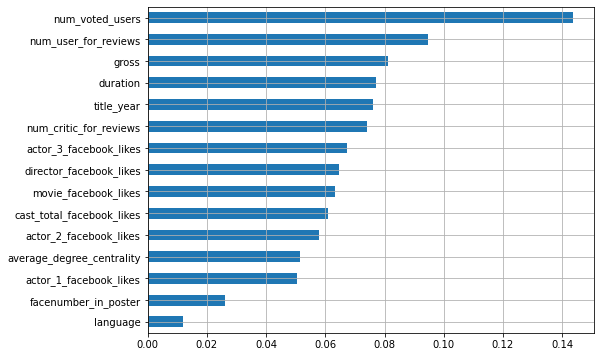

In [122]:
pd.Series(rf.feature_importances_,index=x_train.columns).sort_values().plot.barh(grid=True,figsize=(8,6))

In [116]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [298]:
# logistic regression 不scal影响大
lr_scale = LogisticRegression(max_iter=1000).fit(x_train_scale,y_train)
lr_scale.score(x_train_scale,y_train),lr_scale.score(x_test_scale,y_test)

(0.6991260923845194, 0.6888519134775375)

In [299]:
lr = LogisticRegression(max_iter=1000).fit(x_train,y_train)
lr.score(x_train,y_train),lr.score(x_test,y_test)

C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.6267166042446941, 0.5873544093178037)

In [126]:
lr = LogisticRegression(max_iter=10000).fit(x_train,y_train)
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.6691635455680399, 0.6555740432612313)

In [135]:
lr_tit = LogisticRegression(max_iter=1000).fit(train_tit,y_train)
lr_tit.score(train_tit,y_train),lr_tit.score(test_tit,y_test)

(0.6084061589679567, 0.627287853577371)

In [184]:
confusion_matrix(y_test,lr_tit.predict(test_tit))

array([[  0,   0,   5,   0,   0],
       [  0,   0,  48,   0,   0],
       [  0,   0, 377,   0,   0],
       [  0,   0, 152,   0,   0],
       [  0,   0,  19,   0,   0]], dtype=int64)

In [137]:
pd.Series(lr_tit.predict(train_tit),index=x_train.index)

2971    2
1373    2
1951    2
1805    2
790     2
       ..
1638    2
1095    2
1130    2
1294    2
860     2
Length: 2403, dtype: int64

In [209]:
lr_gen = LogisticRegression(max_iter=1000).fit(train_gen,y_train)
lr_gen.score(train_gen,y_train),lr_tit.score(test_gen,y_test)

(0.6084061589679567, 0.627287853577371)

In [210]:
confusion_matrix(y_test,lr_tit.predict(test_gen))

array([[  0,   0,   5,   0,   0],
       [  0,   0,  48,   0,   0],
       [  0,   0, 377,   0,   0],
       [  0,   0, 152,   0,   0],
       [  0,   0,  19,   0,   0]], dtype=int64)

In [248]:
lr_plot = LogisticRegression(max_iter=1000).fit(train_plot,y_train)
lr_plot.score(train_plot,y_train),lr_plot.score(test_plot,y_test)

(0.6084061589679567, 0.627287853577371)

In [249]:
confusion_matrix(y_test,lr_plot.predict(test_plot))

array([[  0,   0,   5,   0,   0],
       [  0,   0,  48,   0,   0],
       [  0,   0, 377,   0,   0],
       [  0,   0, 152,   0,   0],
       [  0,   0,  19,   0,   0]], dtype=int64)

In [246]:
lr_emb = LogisticRegression(max_iter=1000).fit(train_emb,y_train)
lr_emb.score(train_emb,y_train),lr_emb.score(test_emb,y_test)

(0.6084061589679567, 0.627287853577371)

In [300]:
## one-hot for contentrating, predict and concate for plotkeywords,dirctorname,titleembeding,genres, country?
## 'content_rating','director_name'

# basic feature
basic_tree = train.drop(columns=['id','actor_1_name','actor_2_name','actor_3_name',
                           'movie_title','title_embedding','country','plot_keywords',
                            'director_name','content_rating','genres','language','facenumber_in_poster'])
basic_tree

# split train data for test
x_train, x_test, y_train, y_test = train_test_split(
    basic_tree.drop(columns = 'imdb_score_binned'), basic_tree['imdb_score_binned'], test_size = 0.2, random_state = 42
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

rf =RandomForestClassifier().fit(x_train, y_train)
rf.score(x_train, y_train),rf.score(x_test,y_test)

(1.0, 0.7337770382695508)

In [301]:
confusion_matrix(y_test,rf.predict(x_test))

array([[  0,   0,   4,   1,   0],
       [  0,   2,  45,   1,   0],
       [  0,   1, 346,  30,   0],
       [  0,   0,  62,  86,   4],
       [  0,   0,   3,   9,   7]], dtype=int64)

In [302]:
# normlization
scaler = StandardScaler().fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

# logistic regression 不scal影响大
lr = LogisticRegression(max_iter=1000).fit(x_train_scale,y_train)
lr.score(x_train_scale,y_train),lr.score(x_test_scale,y_test)

(0.6991260923845194, 0.6888519134775375)

In [304]:
basic = train.drop(columns=['id','actor_1_name','actor_2_name','actor_3_name',
                           'movie_title','title_embedding','country','plot_keywords',
                            'director_name','content_rating','genres'])
basic['language']=(basic['language'] == 'English').astype('int')

# split train data for test
x_train, x_test, y_train, y_test = train_test_split(
    basic.drop(columns = 'imdb_score_binned'), basic['imdb_score_binned'], test_size = 0.2, random_state = 42
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

lr = LogisticRegression(max_iter=10000).fit(x_train,y_train)
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.6691635455680399, 0.6555740432612313)

In [318]:
# normlization
scaler = StandardScaler().fit(x_train)
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

# logistic regression 不scal影响大
lr_scale = LogisticRegression(max_iter=1000).fit(x_train_scale,y_train)
lr_scale.score(x_train_scale,y_train),lr_scale.score(x_test_scale,y_test)

(0.7066167290886392, 0.7004991680532446)

In [319]:
print(classification_report(y_test,lr_scale.predict(x_test_scale)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        48
           2       0.72      0.90      0.80       377
           3       0.62      0.45      0.52       152
           4       0.76      0.68      0.72        19

    accuracy                           0.70       601
   macro avg       0.42      0.41      0.41       601
weighted avg       0.63      0.70      0.66       601



C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\L\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m